# Vaccine Rollout (Philippines) Exploratory Data Analysis
**by Ma. Cristina R. Bargo**

*latest update: April 18, 2025*

Exploring the dataset on vaccine distribution obtained from [Our World in Data](https://ourworldindata.org/grapher/cumulative-covid-vaccinations?v=1&csvType=full&useColumnShortNames=false), concentrating on the vaccine rollout in the Philippines. Since this is a nationwide count, we don't have access to the distribution on each city. We therefore adjust by pro-rating the vaccine distribution, using the data on the Philippine population in 2021 obtained from [Worldometer](https://www.worldometers.info/world-population/philippines-population/).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

Since the data obtained is a cumulative count, we converted the count into a daily count by getting the difference between two consecutive cells. And given the 2021 Philippine population count of 113,100,950, the last column computes the pro-rated vaccine distribution when the population size is 5,000,000.

In [2]:
df = pd.read_csv('vaccine-rate.csv')
df.head()

,Entity,Code,Day,COVID-19 doses (cumulative),COVID-19 doses,COVID-19 doses pro-rated
0,Philippines,PHL,2021-02-28,0,0,0.000000
1,Philippines,PHL,2021-03-01,756,756,33.421470
2,Philippines,PHL,2021-03-02,2793,2037,90.052294
3,Philippines,PHL,2021-03-04,10000,7207,318.609172
4,Philippines,PHL,2021-03-06,25138,15138,669.225148


We convert the data type of column `Day` from string to datetime.

In [3]:
df['Day'] = df['Day'].apply(lambda x: parse(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Entity                       258 non-null    object        
 1   Code                         258 non-null    object        
 2   Day                          258 non-null    datetime64[ns]
 3   COVID-19 doses (cumulative)  258 non-null    int64         
 4   COVID-19 doses               258 non-null    int64         
 5   COVID-19 doses pro-rated     258 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 12.2+ KB


We then generate the time series plot of the pro-rated vaccine distribution.

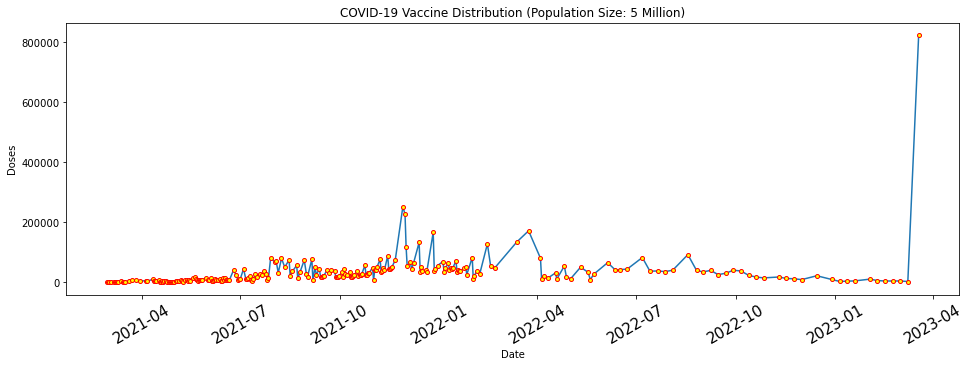

In [4]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(df['Day'],df['COVID-19 doses pro-rated'], marker='o',
         markerfacecolor='yellow', markeredgecolor='red', markersize=4)
plt.title('COVID-19 Vaccine Distribution (Population Size: 5 Million)')
plt.xlabel('Date')
plt.ylabel('Doses')
plt.xticks(rotation=30, fontsize=15)
plt.show()

We observe a big jump towards the end of the time series plot. Going back to the data, it can be noted that there are data points with large gaps between then, indicating that counts are not tallied on a daily basis. This is especially true towards the end of the vaccine distribution. The last two entries of the data are 10 days apart, which may explain the big jump in the time series plot. Since we observe a (relatively) daily count on the first year of implementation of the vaccination program, we only limit the observations from March 1, 2021 up to February 21, 2022.

In [5]:
df1 = df.head(207)
df1

,Entity,Code,Day,COVID-19 doses (cumulative),COVID-19 doses,COVID-19 doses pro-rated
0,Philippines,PHL,2021-02-28,0,0,0.000000
1,Philippines,PHL,2021-03-01,756,756,33.421470
2,Philippines,PHL,2021-03-02,2793,2037,90.052294
3,Philippines,PHL,2021-03-04,10000,7207,318.609172
4,Philippines,PHL,2021-03-06,25138,15138,669.225148
...,...,...,...,...,...,...
202,Philippines,PHL,2022-02-04,128482870,865780,38274.656402
203,Philippines,PHL,2022-02-07,129125464,642594,28407.984195
204,Philippines,PHL,2022-02-14,132013140,2887676,127659.228327
205,Philippines,PHL,2022-02-17,133234110,1220970,53977.000193


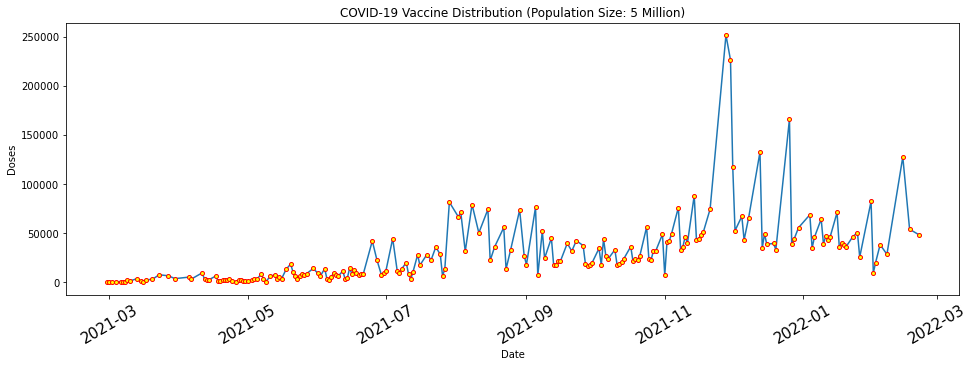

In [6]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(df1['Day'],df1['COVID-19 doses pro-rated'], marker='o',
         markerfacecolor='yellow', markeredgecolor='red', markersize=4)
plt.title('COVID-19 Vaccine Distribution (Population Size: 5 Million)')
plt.xlabel('Date')
plt.ylabel('Doses')
plt.xticks(rotation=30, fontsize=15)
plt.show()

We can still observe some gaps in the time series plot, which may be due to holidays (no vaccines are being distributed) or simply failing to record a tally for the day. We will leave the dataset as is, since our objective is to estimate the distribution of vaccine distribution for our sensitivity analysis. Exact counts are not needed.

To estimate the distribution, we will use the Python library [distfit](https://erdogant.github.io/distfit/pages/html/index.html).

In [7]:
from distfit import distfit

In [8]:
vacc = df1['COVID-19 doses pro-rated'].values
dist = distfit()
dist.fit_transform(vacc)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 6.62454e-10] [loc=28688.838 scale=33695.483]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 1.2126e-10] [loc=0.000 scale=28688.838]
[distfit] >INFO> [pareto    ] [0.05 sec] [RSS: 1.07049e-09] [loc=-2.563 scale=2.563]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 6.24074e-10] [loc=24779.008 scale=23092.391]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 5.60338e-10] [loc=21189.718 scale=18883.491]
[distfit] >INFO> [genextreme] [0.29 sec] [RSS: 1.20784e-09] [loc=3.334 scale=21.115]
[distfit] >INFO> [gamma     ] [0.09 sec] [RSS: 1.69028e-09] [loc=-0.000 scale=3.102]
[distfit] >INFO> [lognorm   ] [0.20 sec] [RSS: 1.19073e-09] [loc=-0.000 scale=11.561]
[distfit] >INFO> [beta      ] [0.13 sec] [RSS: 9.08802e-11] [loc=-0.000 scale=4302834.680]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 1.34334e-09] [loc=0.000 scale=251816.187]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 6.90359e-10] [loc=-13

{'model': {'name': 'beta',
  'score': 9.088019068255826e-11,
  'loc': -1.197495370221827e-23,
  'scale': 4302834.680007711,
  'arg': (0.7340199944487569, 112.5201094419424),
  'params': (0.7340199944487569,
   112.5201094419424,
   -1.197495370221827e-23,
   4302834.680007711),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fbad597bdd8>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 578.2209366543536,
  'CII_max_alpha': 93010.67943668143},
 'summary':           name        score          loc        scale  \
 0         beta  9.08802e-11  -1.1975e-23  4.30283e+06   
 1        expon   1.2126e-10            0      28688.8   
 2            t  5.60338e-10      21189.7      18883.5   
 3     dweibull  6.24074e-10        24779      23092.4   
 4         norm  6.62454e-10      28688.8      33695.5   
 5     loggamma  6.90359e-10  -1.3095e+07  1.70548e+06   
 6       pareto  1.07049e-09     -2.56321      2.56319   
 7      lognorm  1.19

The best fit for the dataset is the beta distribution, followed by the exponential distribution. We first present the results for the beta distribution.

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Beta(loc:-0.000000, scale:4302834.680008)


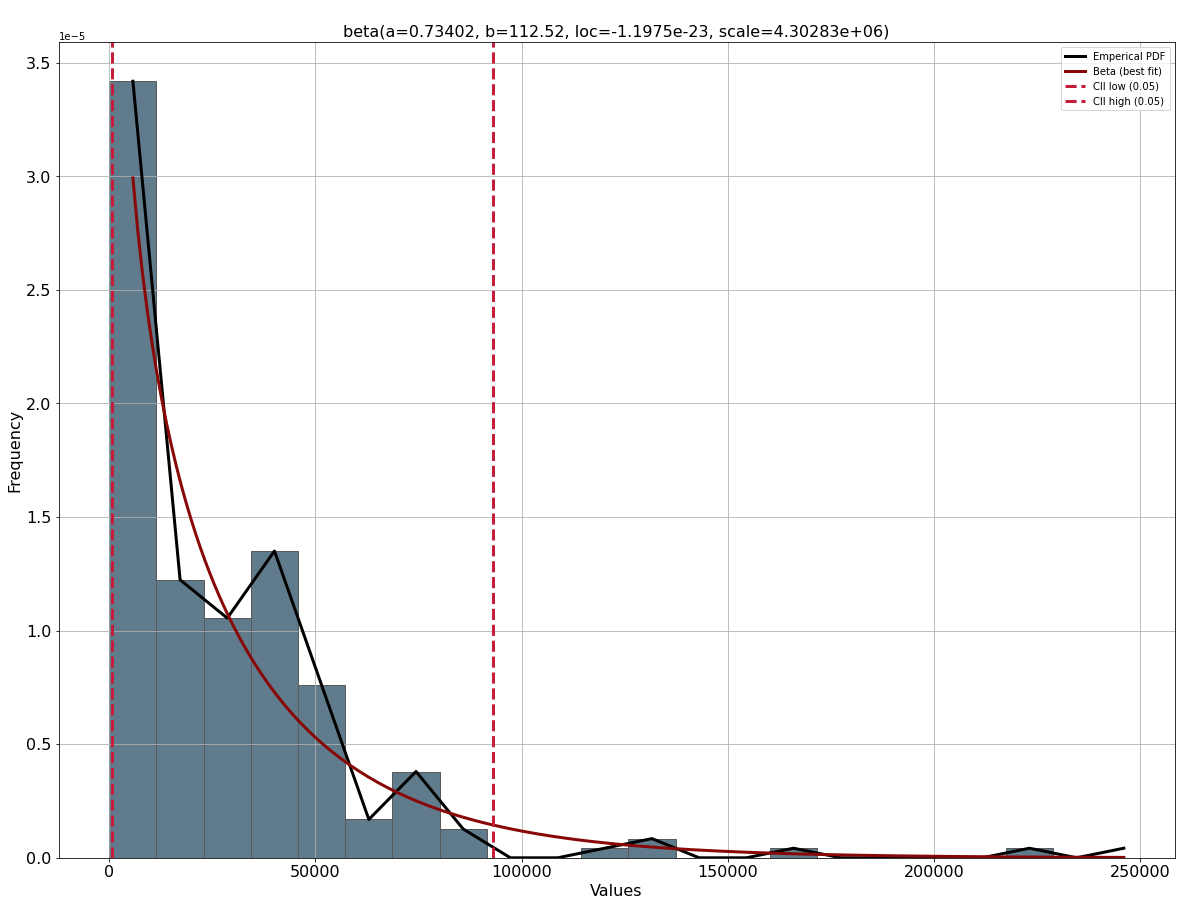

In [9]:
dist.plot()
plt.show()

We also show the results for fitting an exponential distribution, since the results are almost similar.

In [10]:
dist1 = distfit(distr='expon')
dist1.fit_transform(vacc)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [expon] [0.00 sec] [RSS: 1.2126e-10] [loc=0.000 scale=28688.838]
[distfit] >INFO> Compute confidence intervals [parametric]


{'model': {'name': 'expon',
  'score': 1.212603963585557e-10,
  'loc': 0.0,
  'scale': 28688.837561565102,
  'arg': (),
  'params': (0.0, 28688.837561565102),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fbad6078198>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 1471.5449906819763,
  'CII_max_alpha': 85944.07657392853},
 'summary':     name       score loc    scale arg                     params  \
 0  expon  1.2126e-10   0  28688.8  ()  (0.0, 28688.837561565102)   
 
                                                model bootstrap_score  \
 0  <scipy.stats._distn_infrastructure.rv_frozen o...               0   
 
   bootstrap_pass    color  
 0           None  #e41a1c  ,
 'histdata': (array([3.41864268e-05, 1.22395849e-05, 1.05513663e-05, 1.35057489e-05,
         7.59698373e-06, 1.68821861e-06, 3.79849187e-06, 1.26616396e-06,
         0.00000000e+00, 0.00000000e+00, 4.22054652e-07, 8.44109304e-07,
         0.00000000e+00, 0

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:0.000000, scale:28688.837562)


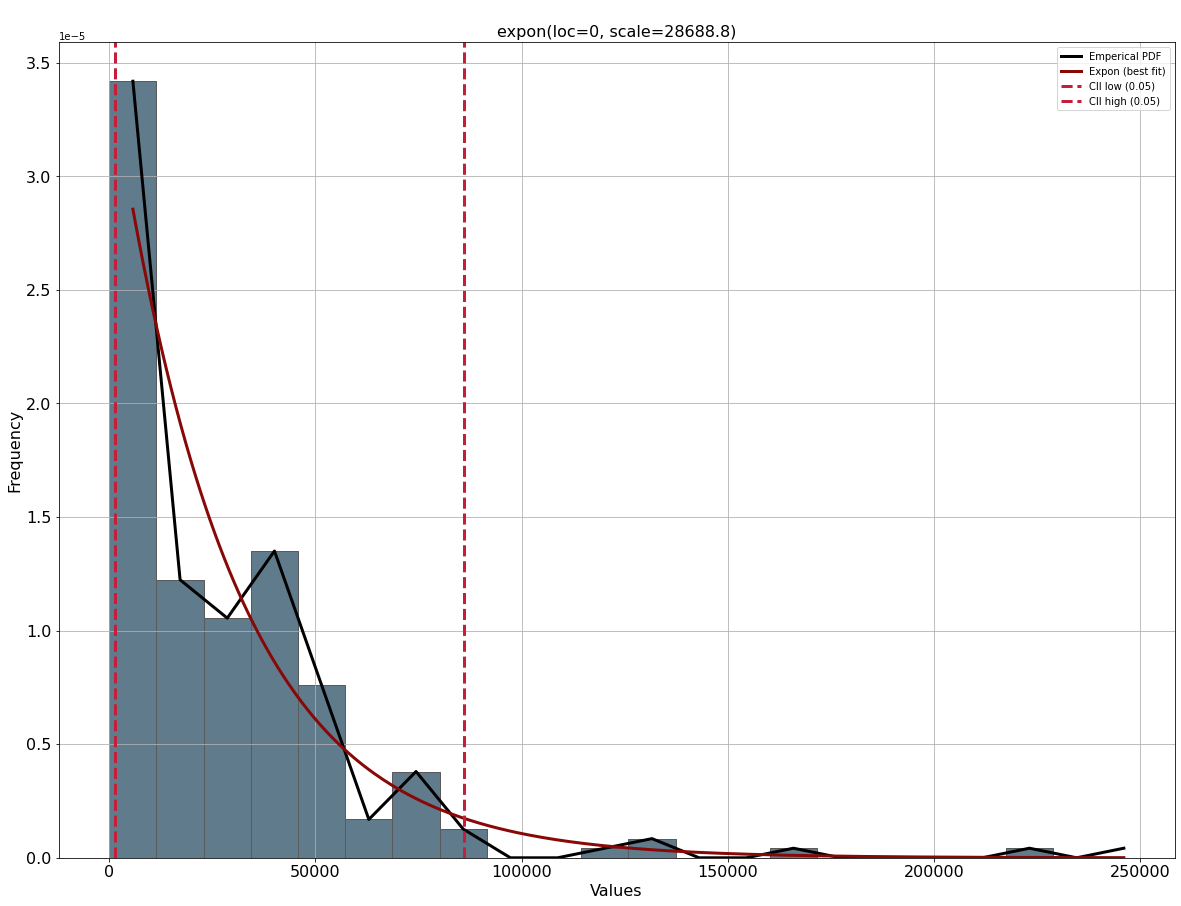

In [11]:
dist1.plot()
plt.show()

# References

* Our World in Data, Total COVID-19 vaccine doses administered, 14 August 2024, https://ourworldindata.org/grapher/cumulative-covid-vaccinations?v=1&csvType=full&useColumnShortNames=false, Accessed: 17 February 2025
* Worldometer, Philippines Population (2025), https://www.worldometers.info/world-population/philippines-population/, Accessed: 17 April 2025
* Matthew Mayo, How to Determine the Best Fitting Data Distribution Using Python, 19 April 2022, https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html, Accessed: 17 April 2025
* Erdogan Taskesen, distfit's documentation!, 2020, https://erdogant.github.io/distfit/pages/html/index.html, Accessed: 17 April 2025